In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Part A : Data Loading and Understanding

In [2]:
df = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')

print("--- Dataset Overview ---")
print(f"Dataset Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)

# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

--- Dataset Overview ---
Dataset Shape: (130663, 17)

Data Types:
artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

Numerical columns: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']
Categorical columns: ['artist_name', 'track_id', 'track_name']


##Part B: Probability and Statistics Analysis


--- Statistical Summary ---
                    mean         var        std
energy          0.569196    0.067762   0.260312
danceability    0.581468    0.036129   0.190077
tempo         119.473353  909.603650  30.159636


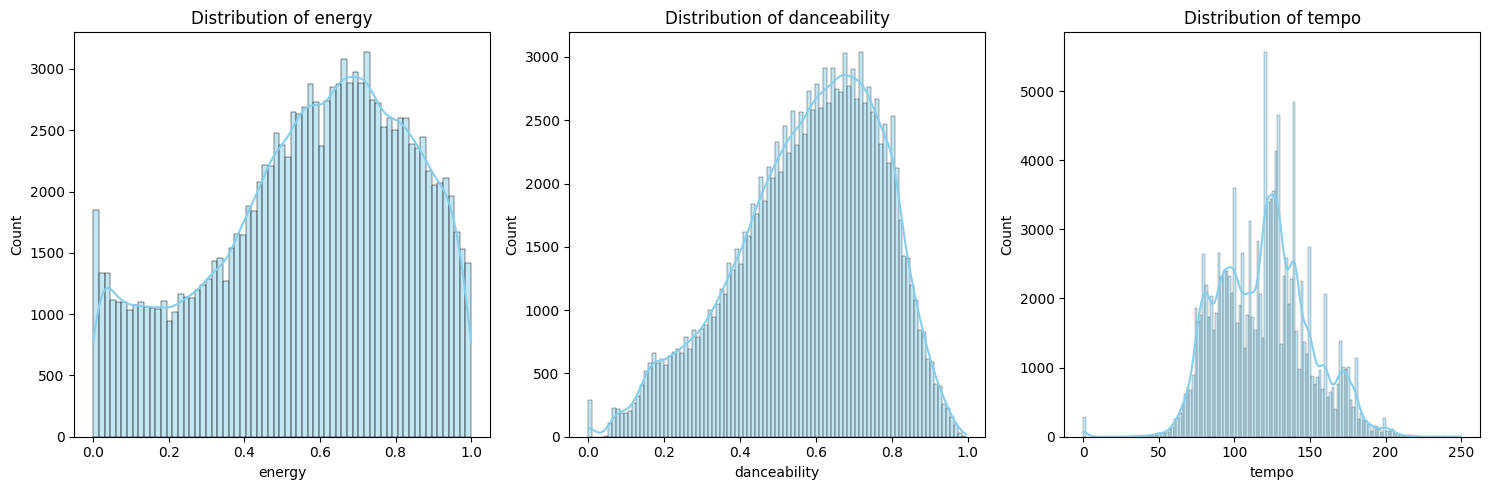

In [3]:
# Compute mean, variance, and standard deviation for key features
stats_features = ['energy', 'danceability', 'tempo']
stats_summary = df[stats_features].agg(['mean', 'var', 'std']).T
print("\n--- Statistical Summary ---")
print(stats_summary)

# Analyze distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(stats_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('distributions.png')

##Part C: Exploratory Data Analysis (EDA)


Missing values check:
artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


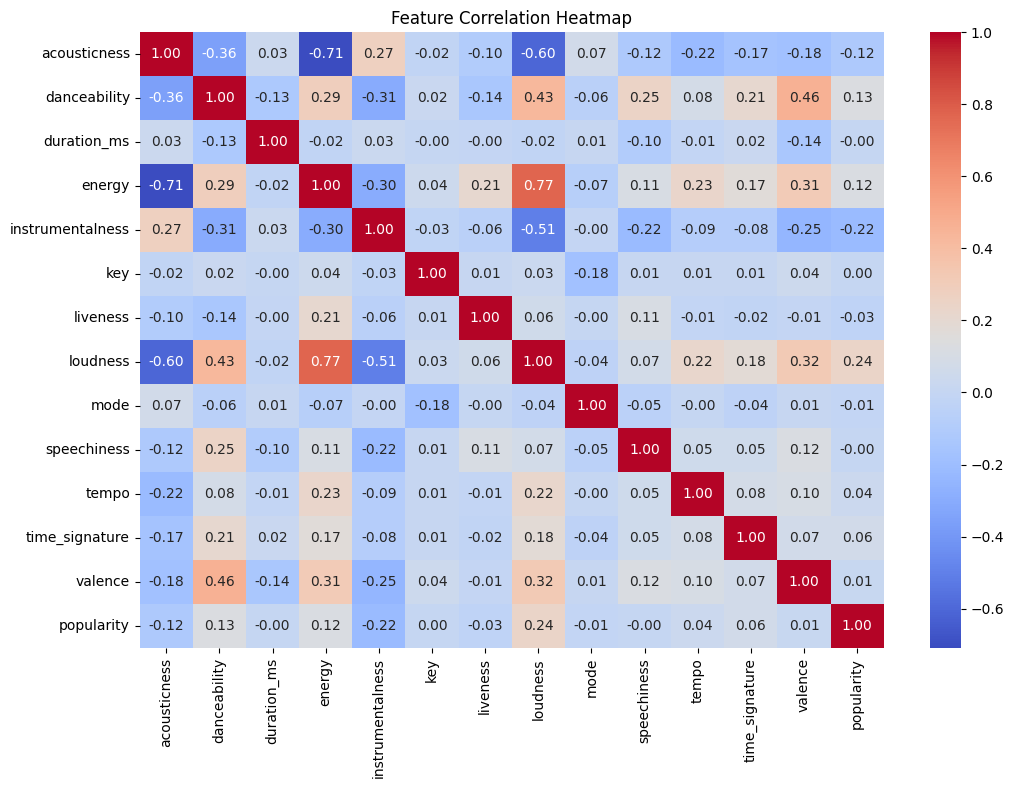

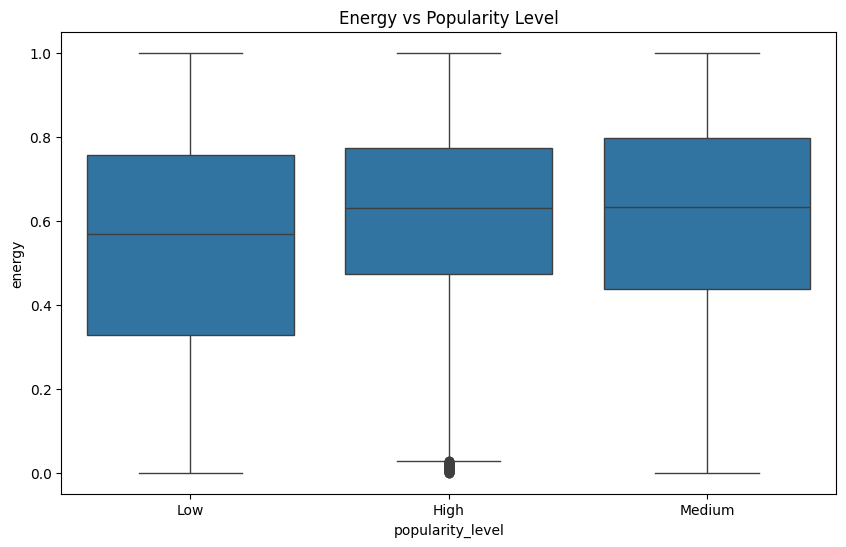

In [4]:
# Handle missing values
print("\nMissing values check:")
print(df.isnull().sum())
df = df.dropna()  # Remove if any

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.savefig('heatmap.png')

# Defining a classification task: Popularity Level
# Since 'genre' is missing, we categorize 'popularity' into 3 levels
def categorize_popularity(p):
    if p <= 20: return 'Low'
    elif p <= 50: return 'Medium'
    else: return 'High'

df['popularity_level'] = df['popularity'].apply(categorize_popularity)

# Feature comparison across popularity levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='popularity_level', y='energy', data=df)
plt.title('Energy vs Popularity Level')
plt.savefig('comparison.png')

##Part D: Supervised Learning


--- Model Evaluation ---
Logistic Regression Accuracy: 0.5302
KNN Accuracy: 0.4862


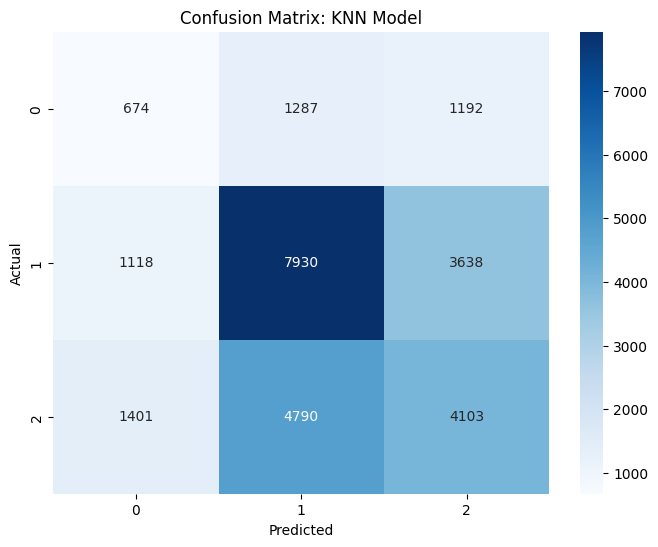

In [5]:
# Prepare data
# Dropping non-predictive columns and the original popularity
X = df.drop(['artist_name', 'track_id', 'track_name', 'popularity', 'popularity_level'], axis=1)
y = df['popularity_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# Model 2: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)

print("\n--- Model Evaluation ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_preds):.4f}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_preds):.4f}")

# Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')

##Part E: Model Testing on New Sample

In [6]:
# Example features for a new song (manual input)
new_song_features = np.array([[0.05, 0.7, 240000, 0.6, 0.0, 5, 0.1, -5.0, 1, 0.05, 120.0, 4, 0.5]])
new_song_scaled = scaler.transform(new_song_features)
prediction = knn_model.predict(new_song_scaled)
print(f"\nPredicted Popularity Level for new sample: {prediction[0]}")


Predicted Popularity Level for new sample: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##

##